In [8]:
import sys
!{sys.executable} -m pip install tabulate --user


In [12]:
import EstrategiaParticionado
from Datos import Datos
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import HTML, display
import numpy as np
import Clasificador
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tabulate
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

**Datos con nuestros clasificadores**

In [3]:
dataset=Datos("Watch_accelerometer.csv")
estrategia = EstrategiaParticionado.ValidacionCruzada(10)

              index  Arrival_Time  Creation_Time             x             y  \
count  3.540962e+06  3.540962e+06   3.540962e+06  3.540962e+06  3.540962e+06   
mean   1.579309e+05  1.424751e+12   2.207217e+14 -4.817605e-01 -2.502070e+00   
std    1.320042e+05  4.284534e+07   9.507786e+13  8.125655e+00  4.781838e+00   
min    0.000000e+00  1.424687e+12   2.026016e+11 -1.966953e+01 -1.970340e+01   
25%    3.594700e+04  1.424697e+12   2.054274e+14 -8.055740e+00 -5.356903e+00   
50%    1.217325e+05  1.424780e+12   2.165193e+14  5.991490e-01 -3.252655e+00   
75%    2.692728e+05  1.424786e+12   2.959673e+14  7.123337e+00 -7.413635e-01   
max    4.594450e+05  1.424789e+12   3.006436e+14  1.961270e+01  1.961270e+01   

                  z  
count  3.540962e+06  
mean   1.936965e+00  
std    3.358283e+00  
min   -1.961330e+01  
25%    3.952026e-03  
50%    1.643433e+00  
75%    4.207809e+00  
max    1.992706e+01  
   index   Arrival_Time   Creation_Time          x          y         z User  \
0

In [23]:
clasificador = Clasificador.ClasificadorNaiveBayes(True, True)
errorNB = clasificador.validacion (estrategia,dataset,clasificador)
print("Error con Naive Bayes "+ str(errorNB))

Error con Naive Bayes 0.5284090909090909


In [5]:
tabla = [["K", "Media de error"]]
errores = []
K = [1,3,5,11,21,51]

for i in range (len(K)):
    clasificador = Clasificador.ClasificadorVecinosProximos(K[i],True)
    error = clasificador.validacion(estrategia,dataset,clasificador)
    errores.append(error)
    print("Calculado error para K = "+ str(K[i]))

for i in range (len(K)):
    k = [K[i],errores[i]]
    tabla.append(k)
display(HTML(tabulate.tabulate(tabla, tablefmt='html')))

Calculado error para K = 1
Calculado error para K = 3
Calculado error para K = 5
Calculado error para K = 11
Calculado error para K = 21
Calculado error para K = 51


K,Media de error
1,0.06477272727272729
3,0.10946969696969698
5,0.20198863636363634
11,0.7563636363636363
21,0.8140151515151516
51,0.8110389610389609


In [6]:
tabla = [["No.Epocas", "Cte.Aprendizaje" ,"Media de error"]]
errores = []
cteAprend = [0.01,0.1,1]
nEpocas = [1,10,50,100]
for i in range (len(nEpocas)):
    for j in range (len(cteAprend)):
        clasificador = Clasificador.ClasificadorRegresionLogistica(nEpocas[i],cteAprend[j])
        error = clasificador.validacion(estrategia,dataset,clasificador)
        errores.append(error)
        print("Calculado error para "+ str(nEpocas[i])+" y "+str(cteAprend[j]))

contador = 0
for i in range (len(nEpocas)):
    for j in range (len(cteAprend)):
        k = [nEpocas[i],cteAprend[j],errores[contador]]
        tabla.append(k)
        contador+=1
display(HTML(tabulate.tabulate(tabla, tablefmt='html')))

C:\Users\Alberto\Desktop\ProyectoFAA\Clasificador.py:346: RuntimeWarning: overflow encountered in double_scalars
  sigmoidal= (1/(1+(math.e**(-1*productoEscalar))))
C:\Users\Alberto\Desktop\ProyectoFAA\Clasificador.py:366: RuntimeWarning: overflow encountered in double_scalars
  sigmoidal = (1/(1+(math.e**(-1*productoEscalar))))


Calculado error para 1 y 0.01
Calculado error para 1 y 0.1
Calculado error para 1 y 1
Calculado error para 10 y 0.01
Calculado error para 10 y 0.1
Calculado error para 10 y 1
Calculado error para 50 y 0.01
Calculado error para 50 y 0.1
Calculado error para 50 y 1
Calculado error para 100 y 0.01
Calculado error para 100 y 0.1
Calculado error para 100 y 1


No.Epocas,Cte.Aprendizaje,Media de error
1,0.01,0.8447443181818184
1,0.1,0.8449494949494951
1,1,0.8451136363636366
10,0.01,0.8453512396694215
10,0.1,0.8431818181818183
10,1,0.843444055944056
50,0.01,0.8436688311688313
50,0.1,0.8426515151515152
50,1,0.8429687500000002
100,0.01,0.8431818181818184


**Datos con SKLearn**

In [14]:
valoresCruzada=[10,20,30,40,50]
erroresNaiveBayes = []
mediasNB = []
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1], sparse=False)
X = encAtributos.fit_transform(dataset.datos[:, :-1])
Y = dataset.datos[:, -4]
Y = np.asarray(Y, dtype=np.float64)
for valorActual in valoresCruzada: #Probamos con un numero de hojas distinto
    print("Calculando error para valorActual = " + str(valorActual))
    for x in range(0,10): #Hacemos 10 simulaciones para obtener una media razonable
        print("Calculando error para x = " + str(x))
        clf = MultinomialNB(alpha = 0)
        score = cross_val_score(clf, X, Y, cv=valorActual) 
        SKmediaErrorNaiveBayes = 1 - score.mean()
        
        mediasNB.append(SKmediaErrorNaiveBayes)
    print("El error medio para Naive Bayes con SKLearn para cv = "+ str(valorActual) + " es : " + str(sum(mediasNB)/len(mediasNB)))
    erroresNaiveBayes.append((valorActual,sum(mediasNB)/len(mediasNB)))

C:\Users\Juanjo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Calculando error para valorActual = 10
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error para x = 5
Calculando error para x = 6
Calculando error para x = 7
Calculando error para x = 8
Calculando error para x = 9
El error medio para Naive Bayes con SKLearn para cv = 10 es : 0.018351619644723094
Calculando error para valorActual = 20
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error para x = 5
Calculando error para x = 6
Calculando error para x = 7
Calculando error para x = 8
Calculando error para x = 9
El error medio para Naive Bayes con SKLearn para cv = 20 es : 0.012640187821623239
Calculando error para valorActual = 30
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error 

In [26]:
tabla = [["CV", "Media de error"]]



for i in range (len(valoresCruzada)):
    k = [valoresCruzada[i],erroresNaiveBayes[i][1]]
    tabla.append(k)
display(HTML(tabulate.tabulate(tabla, tablefmt='html')))

CV,Media de error
10,0.018351619644723094
20,0.012640187821623239
30,0.010410918865209173
40,0.009333061111421875
50,0.008758465695860206


In [15]:
valoresCruzada=[10,20,30,40,50]
errores_KNN = []
mediasKNN = []
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1], sparse=False)
X = encAtributos.fit_transform(dataset.datos[:, :-1])
Y = dataset.datos[:, -4]
Y = np.asarray(Y, dtype=np.float64)
for valorActual in valoresCruzada: #Probamos con un numero de hojas distinto
    print("Calculando error para valorActual = " + str(valorActual))
    for x in range(0,10): #Hacemos 10 simulaciones para obtener una media razonable
        print("Calculando error para x = " + str(x))
        clf = KNeighborsClassifier(n_neighbors=1, p=2, metric='euclidean')#De momento solo con 11 vecinos
        score = cross_val_score(clf, X, Y, cv=valorActual,n_jobs=-1)
        error_medio_KNN = 1 - score.mean()
        mediasKNN.append(error_medio_KNN)
    print("El error medio para KNN con SKLearn para cv = "+ str(valorActual) + " es : " + str(sum(mediasKNN)/len(mediasKNN)))
    errores_KNN.append((valorActual,sum(mediasKNN)/len(mediasKNN)))

C:\Users\Juanjo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Calculando error para valorActual = 10
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error para x = 5
Calculando error para x = 6
Calculando error para x = 7
Calculando error para x = 8
Calculando error para x = 9
El error medio para KNN con SKLearn para cv = 10 es : 0.04103470951107524
Calculando error para valorActual = 20
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error para x = 5
Calculando error para x = 6
Calculando error para x = 7
Calculando error para x = 8
Calculando error para x = 9
El error medio para KNN con SKLearn para cv = 20 es : 0.031957682487574246
Calculando error para valorActual = 30
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error para x = 5
Calcul

In [27]:
tabla = [["CV", "Media de error"]]



for i in range (len(valoresCruzada)):
    k = [valoresCruzada[i],errores_KNN[i][1]]
    tabla.append(k)
display(HTML(tabulate.tabulate(tabla, tablefmt='html')))

CV,Media de error
10,0.04103470951107524
20,0.031957682487574246
30,0.029802217196635228
40,0.027719457383691925
50,0.026560885489331963


In [18]:
valoresCruzada=[10,20,30,40,50]
errores_RegLog = []
mediasRegLog = []
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1], sparse=False)
X = encAtributos.fit_transform(dataset.datos[:, :-1])
Y = dataset.datos[:, -1]
Y = np.asarray(Y, dtype=np.float64)
for valorActual in valoresCruzada: #Probamos con un numero de hojas distinto
    print("Calculando error para valorActual = " + str(valorActual))
    for x in range(0,10): #Hacemos 10 simulaciones para obtener una media razonable
        print("Calculando error para x = " + str(x))
        clf = LogisticRegression(max_iter=10)
        score = cross_val_score(clf, X, Y, cv=valorActual,n_jobs=-1)
        SKmediaErrorRegLog = 1 - score.mean()
        mediasRegLog.append(SKmediaErrorRegLog)
    print("El error medio para Regresion Logistica con SKLearn para cv = "+ str(valorActual) + " es : " + str(sum(mediasRegLog)/len(mediasRegLog)))
    errores_RegLog.append((valorActual,sum(mediasRegLog)/len(mediasRegLog)))

C:\Users\Juanjo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Calculando error para valorActual = 10
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error para x = 5
Calculando error para x = 6
Calculando error para x = 7
Calculando error para x = 8
Calculando error para x = 9
El error medio para Regresion Logistica con SKLearn para cv = 10 es : 0.853923485142005
Calculando error para valorActual = 20
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error para x = 5
Calculando error para x = 6
Calculando error para x = 7
Calculando error para x = 8
Calculando error para x = 9
El error medio para Regresion Logistica con SKLearn para cv = 20 es : 0.7788540592155329
Calculando error para valorActual = 30
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calcul

In [28]:
tabla = [["CV", "Media de error"]]



for i in range (len(valoresCruzada)):
    k = [valoresCruzada[i],errores_RegLog[i][1]]
    tabla.append(k)
display(HTML(tabulate.tabulate(tabla, tablefmt='html')))

CV,Media de error
10,0.853923485142005
20,0.7788540592155329
30,0.7942538134881213
40,0.726880461212871
50,0.6677156692798942


In [19]:
valoresCruzada=[10,20,30,40,50]
mediasRandomForest = []
erroresRandomForest = []
encAtributos = preprocessing.OneHotEncoder(categorical_features=dataset.nominalAtributos[:-1], sparse=False)
X = encAtributos.fit_transform(dataset.datos[:, :-1])
Y = dataset.datos[:, -4]
Y = np.asarray(Y, dtype=np.float64)
for valorActual in valoresCruzada: #Probamos con un numero de hojas distinto
    print("Calculando error para valorActual = " + str(valorActual))
    for x in range(0,10): #Hacemos 10 simulaciones para obtener una media razonable
        print("Calculando error para x = " + str(x))
        clf = RandomForestClassifier(n_estimators = 20)
        score = cross_val_score(clf, X, Y, cv=valorActual) 
        SKmediaErrorRandomForest = 1 - score.mean()
        mediasRandomForest.append(SKmediaErrorRandomForest)
    print("El error medio para Random Forest con SKLearn para cv = "+ str(valorActual) + " es : " + str(sum(mediasRandomForest)/len(mediasRandomForest)))
    erroresRandomForest.append((valorActual,sum(mediasRandomForest)/len(mediasRandomForest)))

C:\Users\Juanjo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Calculando error para valorActual = 10
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error para x = 5
Calculando error para x = 6
Calculando error para x = 7
Calculando error para x = 8
Calculando error para x = 9
El error medio para Random Forest con SKLearn para cv = 10 es : 0.00022988505747125742
Calculando error para valorActual = 20
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculando error para x = 5
Calculando error para x = 6
Calculando error para x = 7
Calculando error para x = 8
Calculando error para x = 9
El error medio para Random Forest con SKLearn para cv = 20 es : 0.00011494252873562871
Calculando error para valorActual = 30
Calculando error para x = 0
Calculando error para x = 1
Calculando error para x = 2
Calculando error para x = 3
Calculando error para x = 4
Calculand

In [29]:
tabla = [["CV", "Media de error"]]



for i in range (len(valoresCruzada)):
    k = [valoresCruzada[i],erroresRandomForest[i][1]]
    tabla.append(k)
display(HTML(tabulate.tabulate(tabla, tablefmt='html')))

CV,Media de error
10,0.00022988505747125742
20,0.00011494252873562871
30,0.00015599343185549822
40,0.0002125464523377446
50,0.00022360859044162184


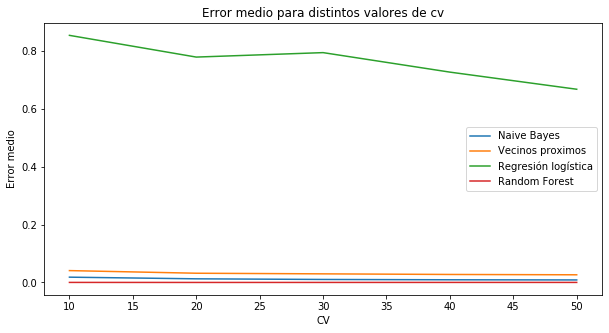

In [22]:
plt.figure(figsize=(10,5))
plt.plot(*zip(*erroresNaiveBayes))
plt.plot(*zip(*errores_KNN))
plt.plot(*zip(*errores_RegLog))
plt.plot(*zip(*erroresRandomForest))
plt.title("Error medio para distintos valores de cv")
plt.xlabel("CV")
plt.ylabel("Error medio")
plt.legend(["Naive Bayes", "Vecinos proximos","Regresión logística", "Random Forest"])
plt.show()

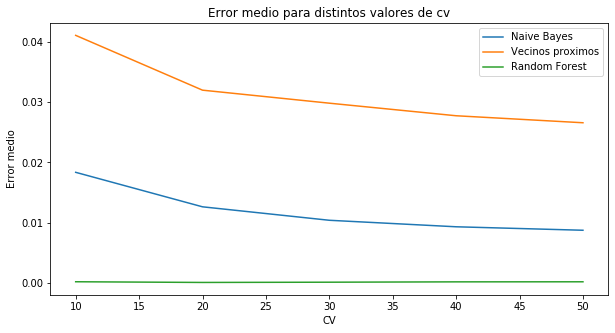

In [21]:
plt.figure(figsize=(10,5))
plt.plot(*zip(*erroresNaiveBayes))
plt.plot(*zip(*errores_KNN))
#plt.plot(*zip(*errores_RegLog))
plt.plot(*zip(*erroresRandomForest))
plt.title("Error medio para distintos valores de cv")
plt.xlabel("CV")
plt.ylabel("Error medio")
plt.legend(["Naive Bayes", "Vecinos proximos", "Random Forest"])
plt.show()